# Estudo de Caso - Análise Exploratória de Dados

### Analisando dados de aluguel de bikes como táxis na cidade de New York.

### Parte I

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
pd.__version__

'1.0.1'

In [2]:
# Importando o arquivo csv
df = pd.read_csv('data/taxis_bikes_nycity.csv')

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df.head(10)

,Data,Distancia,Tempo
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN
5,8/8/15,3.40,NaN
6,8/9/15,2.50,NaN
7,8/10/15,3.36,0:28:37
8,8/11/15,1.67,0:13:07
9,8/12/15,1.42,0:10:35


In [7]:
# Tipo definido pelo pandas
df.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

In [8]:
df.columns

Index(['Data', 'Distancia', 'Tempo'], dtype='object')

In [9]:
df.shape

(81, 3)

In [10]:
df.index

RangeIndex(start=0, stop=81, step=1)

In [11]:
# Uma col
df['Data'].head()

0    8/2/15
1    8/3/15
2    8/4/15
3    8/6/15
4    8/7/15
Name: Data, dtype: object

In [12]:
# Alterar o tipo da var Data de object para data carregando novamente o arquivo csv
df = pd.read_csv('data/taxis_bikes_nycity.csv', parse_dates = ['Data'])

In [13]:
df.dtypes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [15]:
df['Data'].head()

0   2015-08-02
1   2015-08-03
2   2015-08-04
3   2015-08-06
4   2015-08-07
Name: Data, dtype: datetime64[ns]

In [16]:
# Definir a col Data como indice da tabela (mais possibilidades)
df.set_index('Data', inplace = True)

In [17]:
df.head(10)

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07


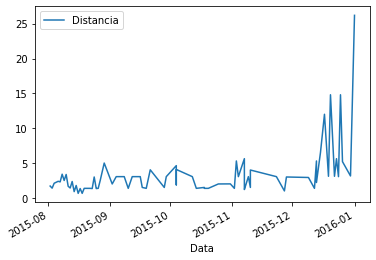

In [18]:
df.plot()

# OBS:ele ja reconhece que a data esta como indice e ja cria uma serie temporal 

In [19]:
?df.plot

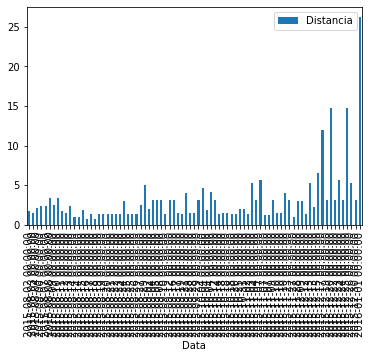

In [21]:
df.plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Count')

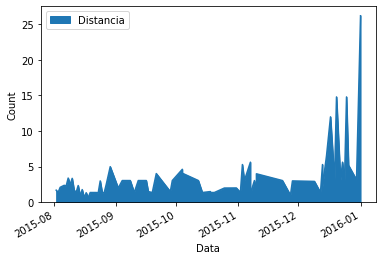

In [22]:
df.plot(kind = 'area')
plt.ylabel("Count")

In [24]:
df.describe()

,Distancia
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


In [26]:
# Fazer o fatiamento por data (mes e ano)
df['2015/11']

,Distancia,Tempo
Data,,
2015-11-02,1.37,0:08:43
2015-11-03,5.30,0:39:26
2015-11-04,3.05,0:22:12
2015-11-07,5.63,0:49:05
2015-11-07,1.26,NaN
2015-11-07,1.20,NaN
2015-11-09,3.05,0:22:36
2015-11-10,1.50,0:09:00
2015-11-10,1.50,0:11:33


In [27]:
# Comprimento dentro dessa data (numero de registros)
len(df['2015/11'])

13

In [28]:
# Salvar o dataframe (resultado das alteracoes)
df.to_csv('data/dataframe_saved_v1.csv')

### Parte II

In [ ]:
# Carregar o arquivo csv
df = pd.read_csv('data/dataframe_saved_v1.csv')

# dizer para converter em tipo data, o JNB nao faz essa conversao.
df = pd.read_csv('data/dataframe_saved_v1.csv', parse_dates = ['Data'])

In [32]:
# Trocar o nome das cols, se necessario 
cols = ['Distancia', 'Tempo']
df.columns = cols
df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


In [33]:
# Funcao para converter a coluna de duracao no tempo em segundos 

def calcula_total_segundos(time):
    if time is np.nan:
        return np.nan
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds

In [34]:
# Aplicar a fc criada acima - gravar o resultado em um nova col
df['Segundos'] = df.Tempo.map(calcula_total_segundos)

In [35]:
df.head(10)

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [37]:
df.describe()

,Distancia,Segundos
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


In [38]:
# Preencher os valore NaN com zero
df.fillna(0).describe()

,Distancia,Segundos
count,81.000000,81.000000
mean,3.137531,1220.901235
std,3.634519,2240.756985
min,0.650000,0.000000
25%,1.370000,0.000000
50%,2.100000,573.000000
75%,3.050000,1426.000000
max,26.200000,15643.000000


In [39]:
# Criar uma col para os minutos
df['Minutos'] = df['Segundos'].map(lambda x: x /60)

In [40]:
df.fillna(0).describe()

,Distancia,Segundos,Minutos
count,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354
std,3.634519,2240.756985,37.345950
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,573.000000,9.550000
75%,3.050000,1426.000000,23.766667
max,26.200000,15643.000000,260.716667


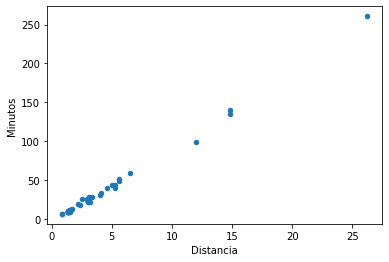

In [41]:
# Plot
df.plot(x = 'Distancia', y = 'Minutos', kind = 'scatter')

In [42]:
# Tabela de correlacao - Utiliza o coef de Pearson - PADRAO
df.corr()

,Distancia,Segundos,Minutos
Distancia,1.000000,0.997203,0.997203
Segundos,0.997203,1.000000,1.000000
Minutos,0.997203,1.000000,1.000000


In [43]:
# Outro coef para o calculo da correlacao
df.corr(method = 'spearman')

,Distancia,Segundos,Minutos
Distancia,1.00000,0.96482,0.96482
Segundos,0.96482,1.00000,1.00000
Minutos,0.96482,1.00000,1.00000


In [44]:
# Outro coef para o calculo da correlacao
df.corr(method = 'kendall')

,Distancia,Segundos,Minutos
Distancia,1.00000,0.88305,0.88305
Segundos,0.88305,1.00000,1.00000
Minutos,0.88305,1.00000,1.00000


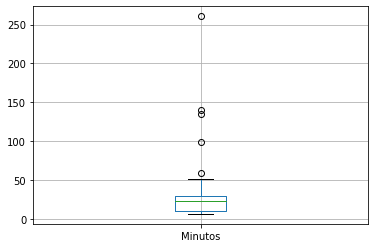

In [45]:
# Para visualizar os outliers
df.boxplot('Minutos', return_type = 'axes')

# Viagens que levaram mais tempo que a media

In [46]:
df['Min_por_Km'] = df['Minutos'] / df['Distancia']

In [47]:
df.fillna(0).describe()

,Distancia,Segundos,Minutos,Min_por_Km
count,81.000000,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354,4.959450
std,3.634519,2240.756985,37.345950,3.803856
min,0.650000,0.000000,0.000000,0.000000
25%,1.370000,0.000000,0.000000,0.000000
50%,2.100000,573.000000,9.550000,6.962963
75%,3.050000,1426.000000,23.766667,7.792350
max,26.200000,15643.000000,260.716667,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31fa81a3d0>]],
      dtype=object)

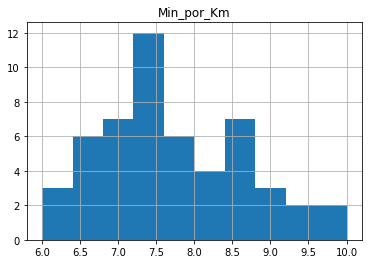

In [48]:
# Hist
df.hist('Min_por_Km')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31fa7f9190>]],
      dtype=object)

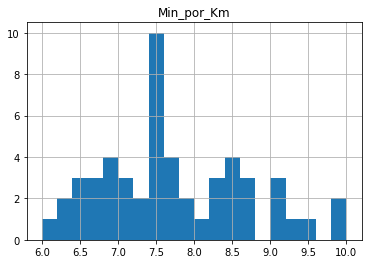

In [49]:
# Mudar a quantidade de bins do hist
df.hist('Min_por_Km', bins = 20)

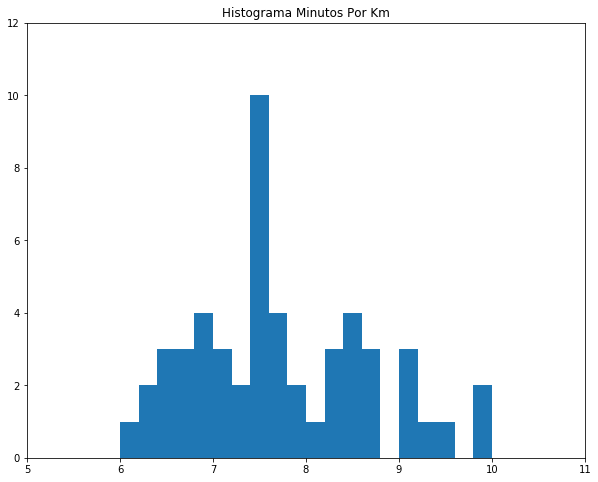

In [51]:
# Criar e salvar o plot
df.hist('Min_por_Km', bins = 20, figsize = (10, 8))
plt.xlim((5, 11))
plt.ylim((0, 12))
plt.title("Histograma Minutos Por Km")
plt.grid(False)
plt.savefig('imagens/hist_minutos_por_km.png')

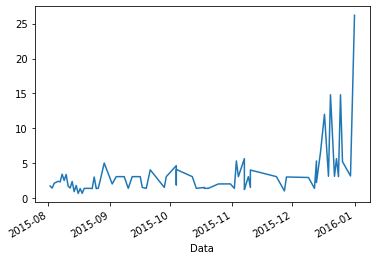

In [53]:
# Criar o plot de uma unica variavel - dist x tempo
df['Distancia'].plot()

In [54]:
df.head()

,Distancia,Tempo,Segundos,Minutos,Min_por_Km
Data,,,,,
2015-08-02,1.70,NaN,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN,NaN


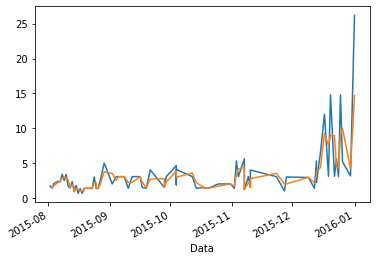

In [55]:
# Pandas
# Calculando a média de distância em uma janela (window) de 2 horas - (rolling statistics)
df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window = 2).mean().plot()

# converter a Distancia em uma Series
# aplicar o rolling de 2hs  (janela)
# para:
# Calcular a media e fazer o plot .mean().plot()
# Result
# Note que a linha azul e a distancia e a linha laranja a media

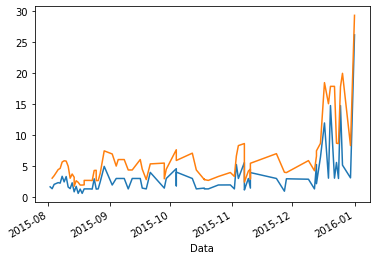

In [56]:
# Pandas
# Calculando a soma de distância em uma janela (window) de 2 horas - (rolling statistics)
df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window = 2).sum().plot()

# Note que a soma acompanha mais a distribuicao dos dados do que a media!

In [57]:
df.index

DatetimeIndex(['2015-08-02', '2015-08-03', '2015-08-04', '2015-08-06',
               '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17',
               '2015-08-18', '2015-08-19', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-25', '2015-08-26', '2015-08-27',
               '2015-08-29', '2015-09-02', '2015-09-04', '2015-09-05',
               '2015-09-08', '2015-09-10', '2015-09-12', '2015-09-16',
               '2015-09-17', '2015-09-19', '2015-09-21', '2015-09-28',
               '2015-09-28', '2015-09-29', '2015-10-04', '2015-10-04',
               '2015-10-04', '2015-10-12', '2015-10-14', '2015-10-18',
               '2015-10-18', '2015-10-18', '2015-10-20', '2015-10-25',
               '2015-10-31', '2015-11-02', '2015-11-03', '2015-11-04',
      

In [58]:
# Aplicar o filtro pelas data
df['2015-11':'2015-12']

,Distancia,Tempo,Segundos,Minutos,Min_por_Km
Data,,,,,
2015-11-02,1.37,0:08:43,523.0,8.716667,6.362530
2015-11-03,5.30,0:39:26,2366.0,39.433333,7.440252
2015-11-04,3.05,0:22:12,1332.0,22.200000,7.278689
2015-11-07,5.63,0:49:05,2945.0,49.083333,8.718176
2015-11-07,1.26,NaN,NaN,NaN,NaN
2015-11-07,1.20,NaN,NaN,NaN,NaN
2015-11-09,3.05,0:22:36,1356.0,22.600000,7.409836
2015-11-10,1.50,0:09:00,540.0,9.000000,6.000000
2015-11-10,1.50,0:11:33,693.0,11.550000,7.700000


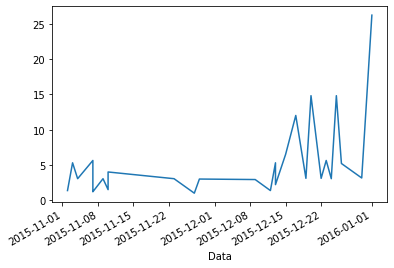

In [59]:
df['2015-11':'2016-1-1']['Distancia'].plot()

In [60]:
df.loc['2015-8-12']

Distancia        1.42
Tempo         0:10:35
Segundos          635
Minutos       10.5833
Min_por_Km    7.45305
Name: 2015-08-12 00:00:00, dtype: object

In [61]:
df.to_csv('data/dataframe_saved_v2.csv')

In [62]:
df.reset_index()

,Data,Distancia,Tempo,Segundos,Minutos,Min_por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459
78,2015-12-26,5.20,NaN,NaN,NaN,NaN
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037


# End